<a href="https://colab.research.google.com/github/Santhoshi-Ravi/mlclimatechange/blob/main/Climate_change_code_san.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tigramite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tigramite import data_processing as pp
from tigramite.independence_tests.parcorr import ParCorr
from tigramite.pcmci import PCMCI
from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_lagfuncs
from tigramite import plotting as tp
import matplotlib.pyplot as plt
import numpy as np
from tigramite.plotting import plot_graph


In [ ]:
data = pd.read_csv('germany_weather.csv')
data.head()

,valid_time,latitude,longitude,number,expver,d2m,t2m,msl,sst,sp,...,lsrr,ptype,tcrw,sf,tcsw,slt,swvl1,swvl2,swvl3,swvl4
0,2023-01-01 00:00:00,55.0,6.00,0,1,282.10767,283.69174,99689.44,282.29858,99698.13,...,0.000227,1.0,0.068604,0.0,0.193359,0.0,0.000013,0.000006,0.000001,0.0
1,2023-01-01 00:00:00,55.0,6.25,0,1,282.06665,283.80893,99701.94,282.29956,99709.13,...,0.000227,1.0,0.085571,0.0,0.258301,0.0,0.000013,0.000006,0.000001,0.0
2,2023-01-01 00:00:00,55.0,6.50,0,1,281.98657,283.83823,99718.94,282.28100,99732.13,...,0.000184,1.0,0.098145,0.0,0.334961,0.0,0.000013,0.000006,0.000001,0.0
3,2023-01-01 00:00:00,55.0,6.75,0,1,281.84595,283.65463,99742.69,282.13843,99747.13,...,0.000184,1.0,0.113281,0.0,0.370605,0.0,0.000013,0.000006,0.000001,0.0
4,2023-01-01 00:00:00,55.0,7.00,0,1,281.68384,283.44760,99767.44,281.97046,99762.13,...,0.000325,1.0,0.133057,0.0,0.398926,0.0,0.000013,0.000006,0.000001,0.0


In [ ]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.6 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=38abfc204463eaca52cfd7e3407be734348cc7152599a7fc271ac6be4b280249
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

In [ ]:
data['valid_time'] = pd.to_datetime(data['valid_time'])


In [ ]:
data.columns

Index(['valid_time', 'latitude', 'longitude', 'number', 'expver', 'd2m', 't2m',
       'msl', 'sst', 'sp', 'tp', 'u100', 'v100', 'cdir', 'cbh', 'hcc', 'mcc',
       'tcc', 'tciw', 'tclw', 'e', 'pev', 'ro', 'sro', 'crr', 'lsrr', 'ptype',
       'tcrw', 'sf', 'tcsw', 'slt', 'swvl1', 'swvl2', 'swvl3', 'swvl4'],
      dtype='object')

In [ ]:
X = data[['tp', 'u100', 'v100','ro', 'sro', 'crr']]
X

,tp,u100,v100,ro,sro,crr
0,0.002342,11.595001,7.782135,0.000000,0.000000e+00,0.000035
1,0.002422,13.095978,8.506744,0.000000,0.000000e+00,0.000035
2,0.002467,13.377228,8.946198,0.000000,0.000000e+00,0.000093
3,0.002937,13.634064,9.364166,0.000000,0.000000e+00,0.000093
4,0.003717,14.230743,9.877838,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...
93171,0.000000,-4.545349,8.746872,0.000003,0.000000e+00,0.000000
93172,0.000198,1.730042,14.111130,0.000007,2.384186e-07,0.000006
93173,0.000289,0.930237,13.647263,0.000007,2.384186e-07,0.000006
93174,0.000455,0.336487,13.406052,0.000012,1.192093e-06,0.000006


In [ ]:
X.dropna()

,tp,u100,v100,ro,sro,crr
0,0.002342,11.595001,7.782135,0.000000,0.000000e+00,0.000035
1,0.002422,13.095978,8.506744,0.000000,0.000000e+00,0.000035
2,0.002467,13.377228,8.946198,0.000000,0.000000e+00,0.000093
3,0.002937,13.634064,9.364166,0.000000,0.000000e+00,0.000093
4,0.003717,14.230743,9.877838,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...
93171,0.000000,-4.545349,8.746872,0.000003,0.000000e+00,0.000000
93172,0.000198,1.730042,14.111130,0.000007,2.384186e-07,0.000006
93173,0.000289,0.930237,13.647263,0.000007,2.384186e-07,0.000006
93174,0.000455,0.336487,13.406052,0.000012,1.192093e-06,0.000006


In [ ]:
data = data.rename(columns={
    'valid_time': 'valid_time',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'number': 'ensemble_member_number',
    'expver': 'experiment_version_number',
    'd2m': 'dewpoint_temperature_2m',
    't2m': 'temperature_2m',
    'msl': 'mean_sea_level_pressure',
    'sst': 'sea_surface_temperature',
    'sp': 'surface_pressure',
    'tp': 'total_precipitation',
    'u100': 'wind_u_component_100m',
    'v100': 'wind_v_component_100m',
    'cdir': 'clear_sky_direct_radiation',
    'cbh': 'cloud_base_height',
    'hcc': 'high_cloud_cover',
    'mcc': 'medium_cloud_cover',
    'tcc': 'total_cloud_cover',
    'tciw': 'total_column_cloud_ice_water',
    'tclw': 'total_column_cloud_liquid_water',
    'e': 'evaporation',
    'pev': 'potential_evaporation',
    'ro': 'runoff',
    'sro': 'surface_runoff',
    'crr': 'convective_rain_rate',
    'lsrr': 'large_scale_rain_rate',
    'ptype': 'precipitation_type',
    'tcrw': 'total_column_rain_water',
    'sf': 'snowfall',
    'tcsw': 'total_column_snow_water',
    'slt': 'soil_type',
    'swvl1': 'volumetric_soil_water_layer_1',
    'swvl2': 'volumetric_soil_water_layer_2',
    'swvl3': 'volumetric_soil_water_layer_3',
    'swvl4': 'volumetric_soil_water_layer_4'
})


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)


In [ ]:
data_scaled

,tp,u100,v100,ro,sro,crr
0,6.604771,1.083107,1.039549,-0.138420,-0.031869,0.256771
1,6.844177,1.278867,1.160507,-0.138420,-0.031869,0.256771
2,6.978130,1.315548,1.233865,-0.138420,-0.031869,1.048014
3,8.381789,1.349045,1.303637,-0.138420,-0.031869,1.048014
4,10.714572,1.426864,1.389384,-0.138420,-0.031869,-0.231162
...,...,...,...,...,...,...
93171,-0.395001,-1.021943,1.200592,0.328588,-0.031869,-0.231162
93172,0.196389,-0.203496,2.096047,0.951266,0.011112,-0.147092
93173,0.469995,-0.307808,2.018613,0.951266,0.011112,-0.153686
93174,0.965908,-0.385246,1.978348,1.846364,0.183035,-0.153686


In [ ]:
data_scaled = data_scaled.rename(columns={
    'tp': 'total_precipitation',
    'u100': 'wind_u_component_100m',
    'v100': 'wind_v_component_100m',
    'ro': 'runoff',
    'sro': 'surface_runoff',
    'crr': 'convective_rain_rate'
})


In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


tp      8.869171e-05
u100    1.094130e+01
v100    8.378380e+00
ro      4.768372e-07
sro     0.000000e+00
crr     1.192093e-06
dtype: float64


In [ ]:
model = lingam.DirectLiNGAM()
model.fit(X)

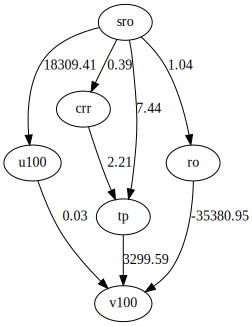

In [ ]:
make_dot(model.adjacency_matrix_, labels=X.columns.tolist())


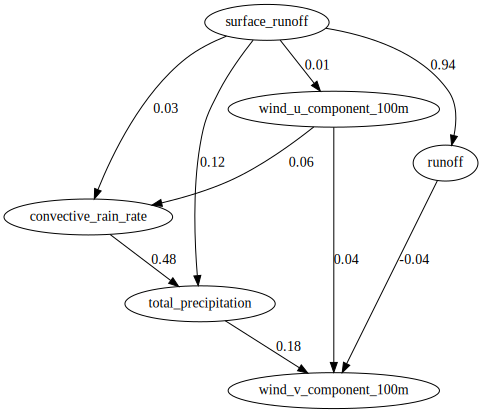

In [ ]:
model = lingam.DirectLiNGAM()
model.fit(data_scaled)
make_dot(model.adjacency_matrix_, labels=data_scaled.columns.tolist())


In [ ]:
data_scaled[['total_precipitation', 'surface_runoff']].corr()


,total_precipitation,surface_runoff
total_precipitation,1.000000,0.138126
surface_runoff,0.138126,1.000000


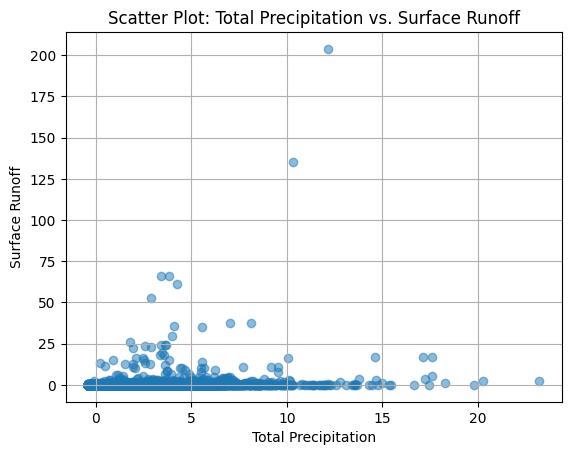

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data_scaled['total_precipitation'], data_scaled['surface_runoff'], alpha=0.5)
plt.xlabel("Total Precipitation")
plt.ylabel("Surface Runoff")
plt.title("Scatter Plot: Total Precipitation vs. Surface Runoff")
plt.grid()
plt.show()


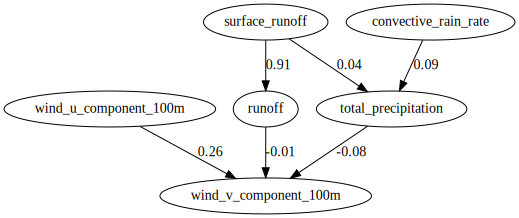

In [ ]:
new = data_scaled[data_scaled['total_precipitation'] >5]
model = lingam.DirectLiNGAM()
model.fit(new)
make_dot(model.adjacency_matrix_, labels=new.columns.tolist())

In [ ]:
# Get the learned adjacency matrix
adj_matrix = model.adjacency_matrix_

# Create a counterfactual intervention: Reduce `tp` by 50%
X_cf = data_scaled.copy()
X_cf['total_precipitation'] *= 0.5  # Reduce 'tp' by 50%

# Apply the adjacency matrix to propagate the effect
X_cf_matrix = X_cf.to_numpy()  # Convert to NumPy for matrix operations
for i in range(X_cf_matrix.shape[1]):
    for j in range(i):  # Process parents of variable i
        X_cf_matrix[:, i] += X_cf_matrix[:, j] * adj_matrix[j, i]

# Convert the result back to a DataFrame
X_cf_result = pd.DataFrame(X_cf_matrix, columns=data_scaled.columns)

# Compare original and counterfactual results
print("Original ro mean:", data_scaled['runoff'].mean())
print("Counterfactual ro mean:", X_cf_result['runoff'].mean())

Original ro mean: 1.464156062354461e-17
Counterfactual ro mean: -2.440260103924101e-18


In [ ]:
X_cf_result['runoff'].mean()/data_scaled['runoff'].mean()

-0.16666666666666663

In [ ]:
data.columns

Index(['valid_time', 'latitude', 'longitude', 'ensemble_member_number',
       'experiment_version_number', 'dewpoint_temperature_2m',
       'temperature_2m', 'mean_sea_level_pressure', 'sea_surface_temperature',
       'surface_pressure', 'total_precipitation', 'wind_u_component_100m',
       'wind_v_component_100m', 'clear_sky_direct_radiation',
       'cloud_base_height', 'high_cloud_cover', 'medium_cloud_cover',
       'total_cloud_cover', 'total_column_cloud_ice_water',
       'total_column_cloud_liquid_water', 'evaporation',
       'potential_evaporation', 'runoff', 'surface_runoff',
       'convective_rain_rate', 'large_scale_rain_rate', 'precipitation_type',
       'total_column_rain_water', 'snowfall', 'total_column_snow_water',
       'soil_type', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_4'],
      dtype='object')

In [ ]:
next_set = data[['mean_sea_level_pressure', 'sea_surface_temperature',
       'surface_pressure', 'total_precipitation', 'wind_u_component_100m',
       'wind_v_component_100m',]]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93176 entries, 0 to 93175
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   valid_time                       93176 non-null  datetime64[ns]
 1   latitude                         93176 non-null  float64       
 2   longitude                        93176 non-null  float64       
 3   ensemble_member_number           93176 non-null  int64         
 4   experiment_version_number        93176 non-null  int64         
 5   dewpoint_temperature_2m          93176 non-null  float64       
 6   temperature_2m                   93176 non-null  float64       
 7   mean_sea_level_pressure          93176 non-null  float64       
 8   sea_surface_temperature          93176 non-null  float64       
 9   surface_pressure                 93176 non-null  float64       
 10  total_precipitation              93176 non-null  float64  

In [ ]:
def make_causal_graph(given_df):
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(given_df)
  data_scaled = pd.DataFrame(data_scaled, columns=given_df.columns)
  model = lingam.DirectLiNGAM()
  model.fit(data_scaled)
  return model



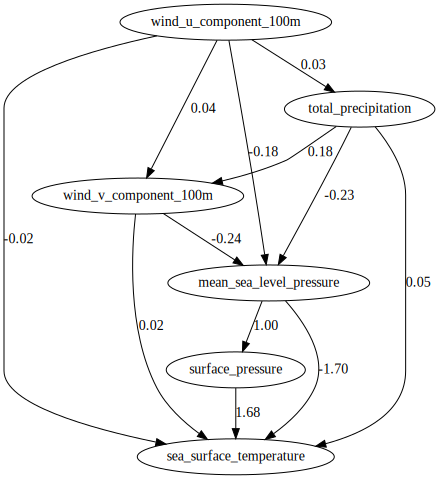

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(next_set)
data_scaled = pd.DataFrame(data_scaled, columns=next_set.columns)
model = lingam.DirectLiNGAM()
model.fit(data_scaled)
make_dot(model.adjacency_matrix_, labels=next_set.columns.tolist())

In [ ]:
data.columns

Index(['valid_time', 'latitude', 'longitude', 'ensemble_member_number',
       'experiment_version_number', 'dewpoint_temperature_2m',
       'temperature_2m', 'mean_sea_level_pressure', 'sea_surface_temperature',
       'surface_pressure', 'total_precipitation', 'wind_u_component_100m',
       'wind_v_component_100m', 'clear_sky_direct_radiation',
       'cloud_base_height', 'high_cloud_cover', 'medium_cloud_cover',
       'total_cloud_cover', 'total_column_cloud_ice_water',
       'total_column_cloud_liquid_water', 'evaporation',
       'potential_evaporation', 'runoff', 'surface_runoff',
       'convective_rain_rate', 'large_scale_rain_rate', 'precipitation_type',
       'total_column_rain_water', 'snowfall', 'total_column_snow_water',
       'soil_type', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_4'],
      dtype='object')

In [ ]:
round(data['snowfall'],4).unique()

array([0.    , 0.0001, 0.0003, 0.0005, 0.0002, 0.0008, 0.0006, 0.0004])

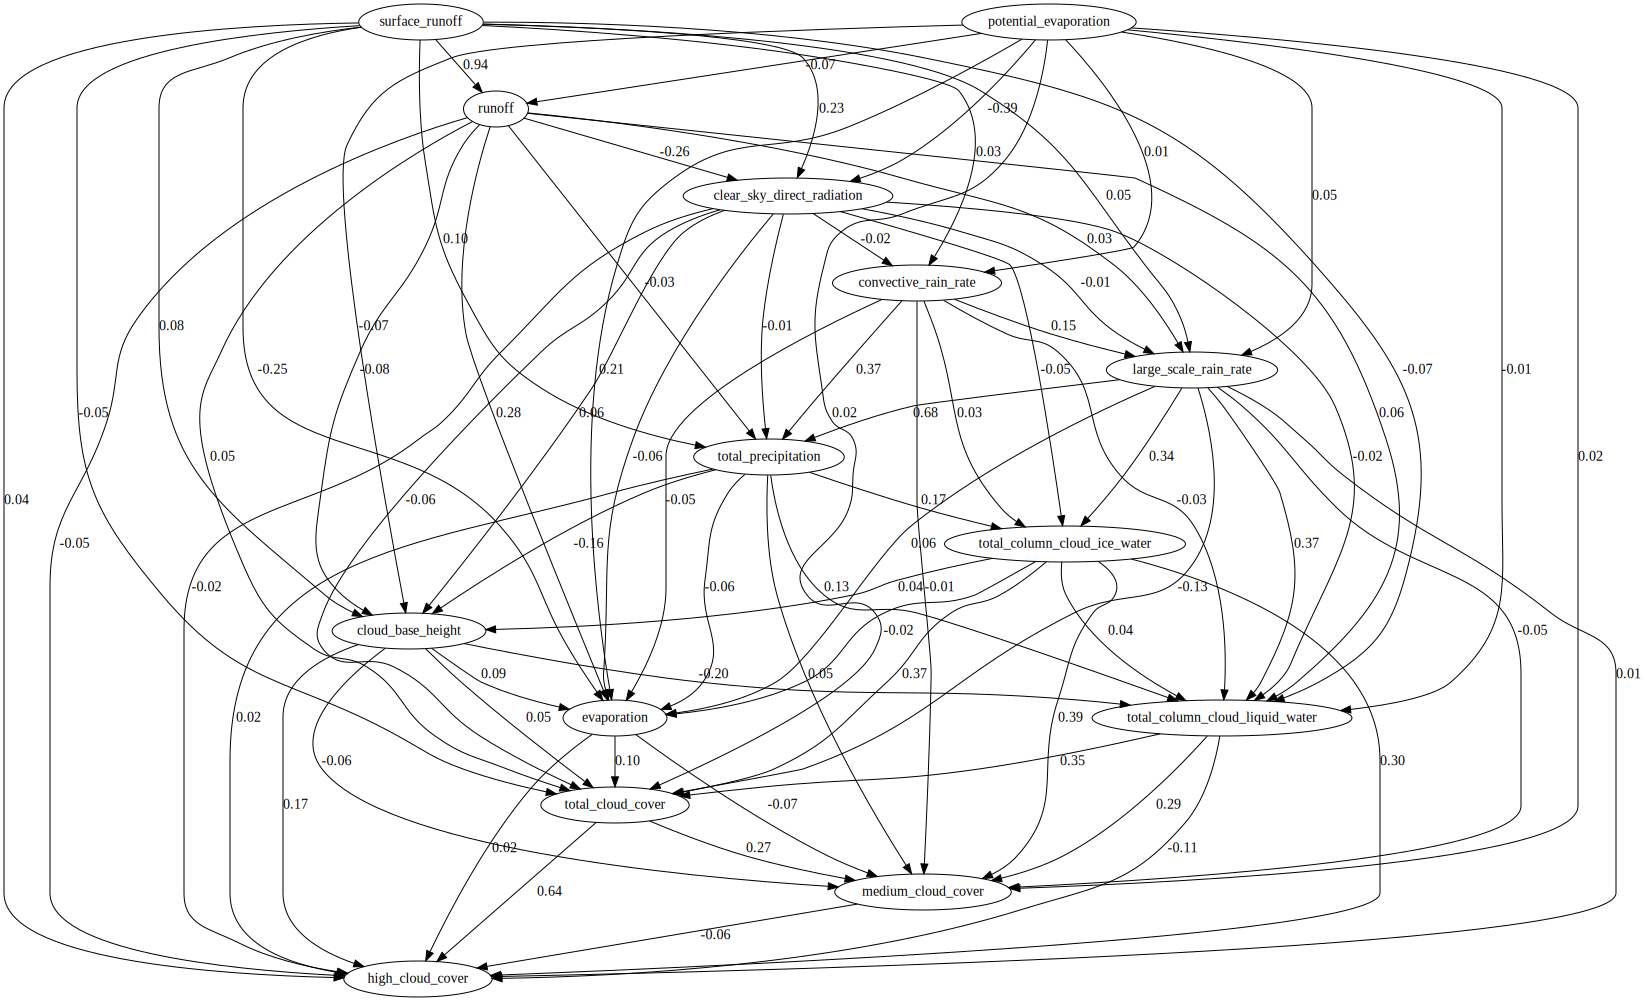

In [ ]:
next_set = data[['clear_sky_direct_radiation',
       'cloud_base_height', 'high_cloud_cover', 'medium_cloud_cover',
       'total_cloud_cover', 'total_column_cloud_ice_water',
       'total_column_cloud_liquid_water', 'evaporation',
       'potential_evaporation', 'runoff', 'surface_runoff',
       'convective_rain_rate', 'large_scale_rain_rate','total_precipitation']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(next_set)
data_scaled = pd.DataFrame(data_scaled, columns=next_set.columns)
model = lingam.DirectLiNGAM()
model.fit(data_scaled)
make_dot(model.adjacency_matrix_, labels=next_set.columns.tolist())

In [ ]:
# Assume `model.adjacency_matrix_` is the adjacency matrix from your causal discovery model
adj_matrix = model.adjacency_matrix_  # Replace with your adjacency matrix
labels = ['runoff', 'clear_sky_direct_radiation', 'convective_rain_rate',
          'large_scale_rain_rate', 'total_precipitation', 'total_column_cloud_ice_water']

# Set a threshold to remove weak edges
threshold = 0.05
filtered_matrix = np.where(np.abs(adj_matrix) >= threshold, adj_matrix, 0)

In [ ]:
filtered_matrix.shape

(14, 14)

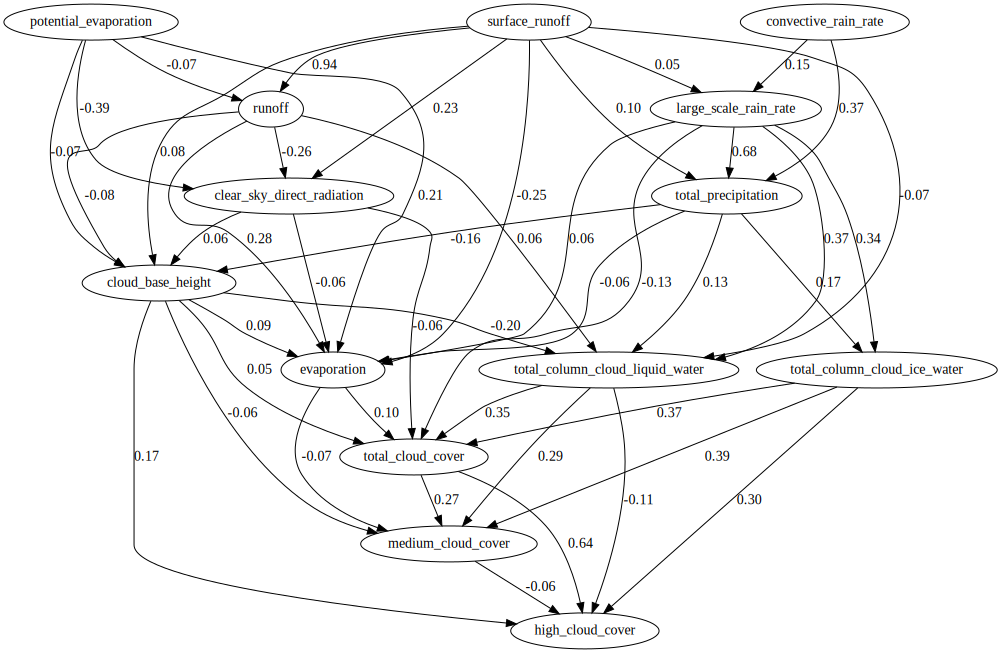

In [ ]:
make_dot(filtered_matrix, labels=next_set.columns.tolist() )

In [ ]:
len(next_set.columns.tolist())

14

In [ ]:
# Define node categories (example mapping)
node_categories = {
    'runoff': 'Runoff',
    'clear_sky_direct_radiation': 'Radiation',
    'convective_rain_rate': 'Precipitation',
    'large_scale_rain_rate': 'Precipitation',
    'total_precipitation': 'Precipitation',
    'total_column_cloud_ice_water': 'Cloud Properties'
}

# Define color mapping for categories
color_mapping = {
    'Runoff': 'green',
    'Radiation': 'orange',
    'Precipitation': 'blue',
    'Cloud Properties': 'purple'
}

# Assign colors to nodes
node_colors = {node: color_mapping[category] for node, category in node_categories.items()}
from graphviz import Digraph

def make_colored_dot(matrix, labels, node_colors):
    dot = Digraph()

    # Add nodes with colors
    for node in labels:
        dot.node(node, style='filled', fillcolor=node_colors.get(node, 'lightgrey'))

    # Add edges with weights
    for i in range(len(labels)):
        for j in range(len(labels)):
            weight = matrix[i, j]
            if weight != 0:  # Only add edges with non-zero weights
                dot.edge(labels[i], labels[j], label=f"{weight:.2f}")

    return dot
# Call the function with filtered matrix, labels, and node colors
dot = make_colored_dot(filtered_matrix, labels, node_colors)

# Render or display the graph
dot.render('causal_graph', format='png', cleanup=True)  # Save as PNG
dot.view()  # Open the rendered graph


'causal_graph.pdf'

In [ ]:
from graphviz import Digraph

def make_colored_dot(matrix, labels):
    dot = Digraph()

    # Add nodes
    for node in labels:
        dot.node(node)

    # Define edge coloring based on weight
    def edge_color(weight):
        if weight > 0:
            return 'blue'
        elif weight < 0:
            return 'red'
        else:
            return 'black'

    # Add edges with colors
    for i in range(len(labels)):
        for j in range(len(labels)):
            weight = matrix[i, j]
            if weight != 0:  # Only add edges with non-zero weights
                color = edge_color(weight)
                dot.edge(labels[i], labels[j], label=f"{weight:.2f}", color=color)

    return dot


In [ ]:

dot = make_colored_dot(filtered_matrix, labels)
dot.render('causal_graph_with_colors', format='png', cleanup=True)  # Save as PNG
dot.view()  # Open the rendered graph


'causal_graph_with_colors.pdf'

In [ ]:
filtered_matrix.shape

(14, 14)

In [ ]:
# Assuming `next_set.columns` contains all your column names
labels = next_set.columns.tolist()  # Dynamically extract all column names

# Set a threshold to filter weak edges
threshold = 0.05
filtered_matrix = np.where(np.abs(model.adjacency_matrix_) >= threshold, model.adjacency_matrix_, 0)

# Check the filtered matrix dimensions match the labels
if filtered_matrix.shape[0] != len(labels):
    raise ValueError("Mismatch between matrix dimensions and labels length!")


In [ ]:

dot = make_colored_dot(filtered_matrix, labels)
dot.render('causal_graph_with_colors', format='png', cleanup=True)  # Save as PNG
dot.view()  # Open the rendered graph


'causal_graph_with_colors.pdf'

In [ ]:
# !pip install causal-learn


In [ ]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
import numpy as np

In [ ]:
import numpy as np

next_set_array = np.array(data_scaled)

  0%|          | 0/14 [00:00<?, ?it/s]

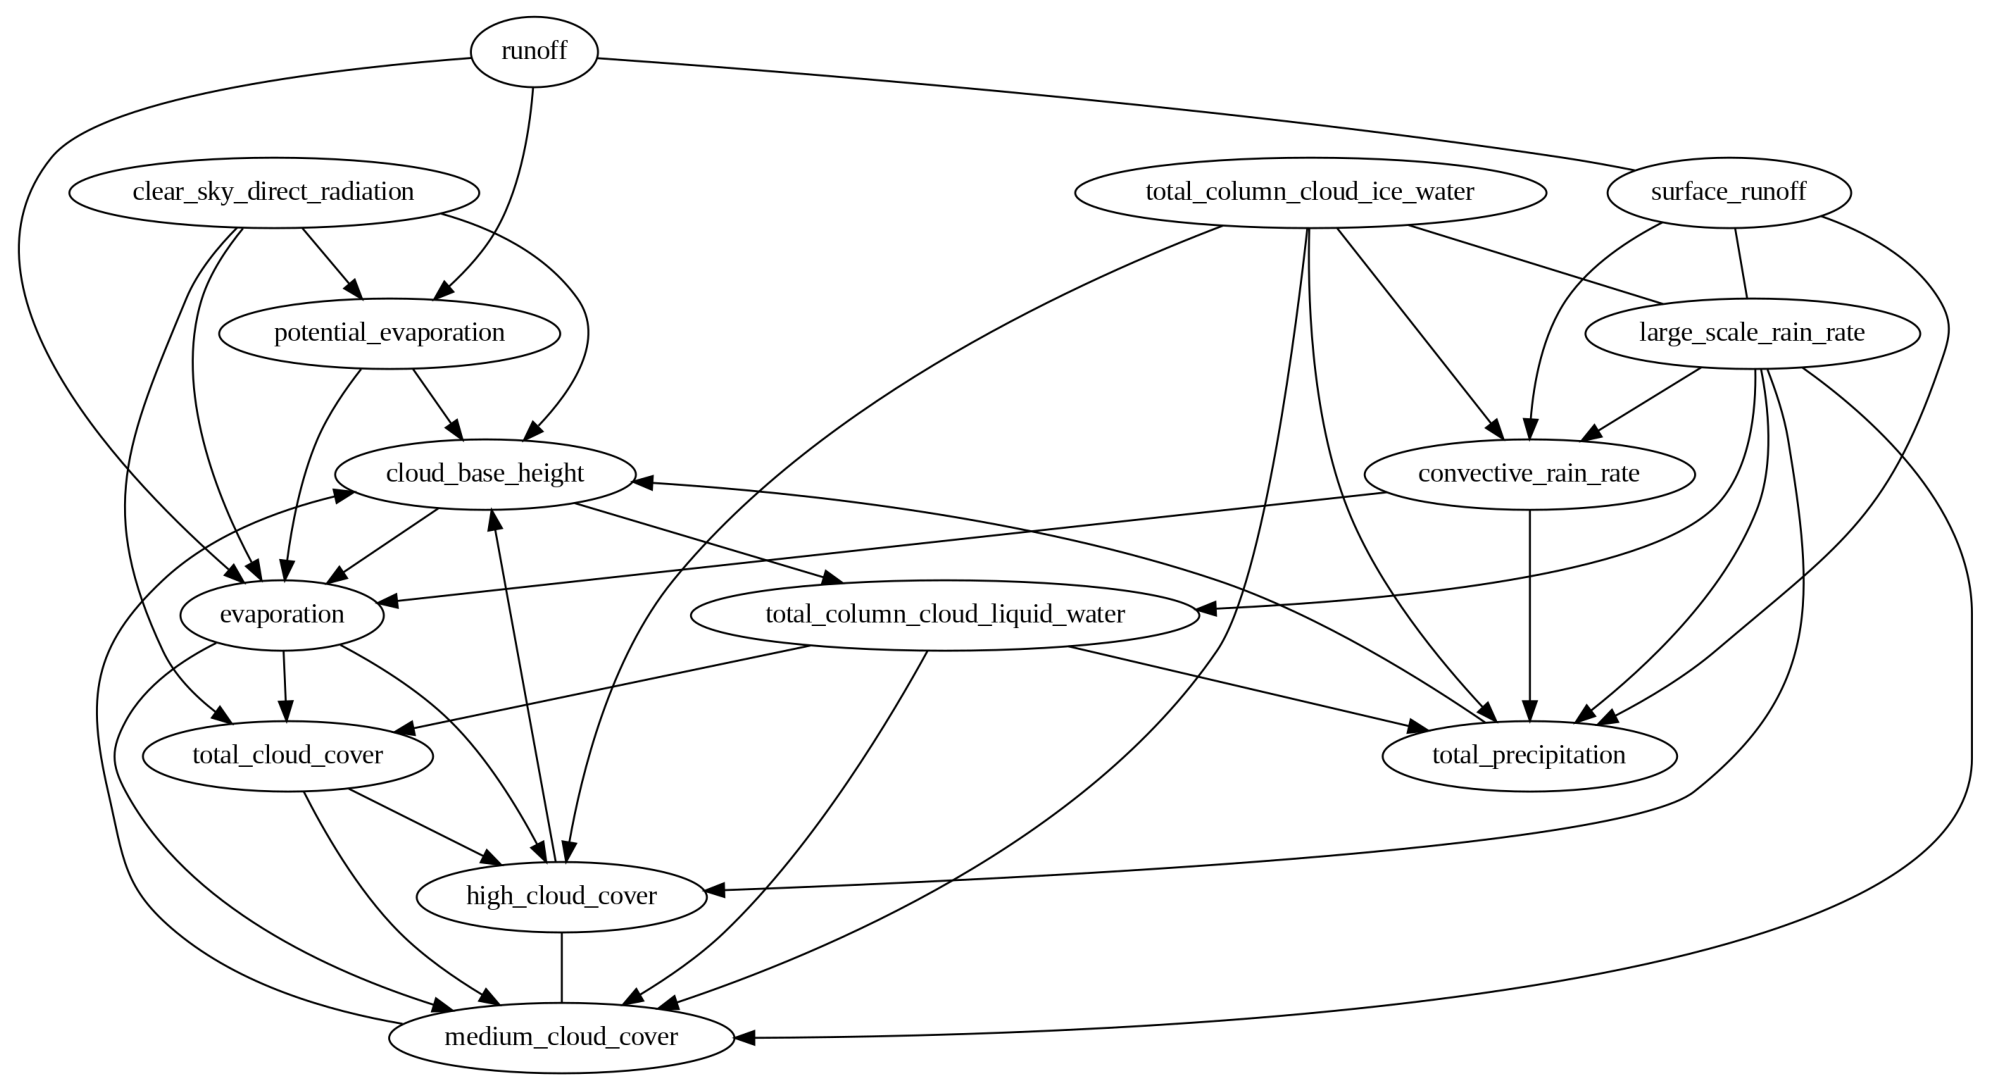

In [ ]:
cg = pc(next_set_array, alpha=0.05)  # alpha is the significance level for independence tests
cg.draw_pydot_graph(labels = data_scaled.columns.to_list())


In [ ]:
from causallearn.search.ConstraintBased.FCI import fci


g, edges = fci(next_set_array)
# g.draw_pydot_graph(labels = next_set.columns.to_list())

  0%|          | 0/14 [00:00<?, ?it/s]

X5 --> X1
X1 --> X9
X2 --> X7
X2 --> X8
X5 --> X4
X12 --> X6
X13 --> X6
X6 --> X14
X12 --> X14


AttributeError: 'GeneralGraph' object has no attribute 'draw_pydot_graph'

In [ ]:
pdy = GraphUtils.to_pydot(g, labels = next_set.columns.to_list())
pdy.write_png('fci.png')

In [ ]:
next_set.columns

Index(['clear_sky_direct_radiation', 'cloud_base_height', 'high_cloud_cover',
       'medium_cloud_cover', 'total_cloud_cover',
       'total_column_cloud_ice_water', 'total_column_cloud_liquid_water',
       'evaporation', 'potential_evaporation', 'runoff', 'surface_runoff',
       'convective_rain_rate', 'large_scale_rain_rate', 'total_precipitation'],
      dtype='object')

In [ ]:
data.columns

Index(['valid_time', 'latitude', 'longitude', 'ensemble_member_number',
       'experiment_version_number', 'dewpoint_temperature_2m',
       'temperature_2m', 'mean_sea_level_pressure', 'sea_surface_temperature',
       'surface_pressure', 'total_precipitation', 'wind_u_component_100m',
       'wind_v_component_100m', 'clear_sky_direct_radiation',
       'cloud_base_height', 'high_cloud_cover', 'medium_cloud_cover',
       'total_cloud_cover', 'total_column_cloud_ice_water',
       'total_column_cloud_liquid_water', 'evaporation',
       'potential_evaporation', 'runoff', 'surface_runoff',
       'convective_rain_rate', 'large_scale_rain_rate', 'precipitation_type',
       'total_column_rain_water', 'snowfall', 'total_column_snow_water',
       'soil_type', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_4'],
      dtype='object')

In [ ]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(next_set_array)

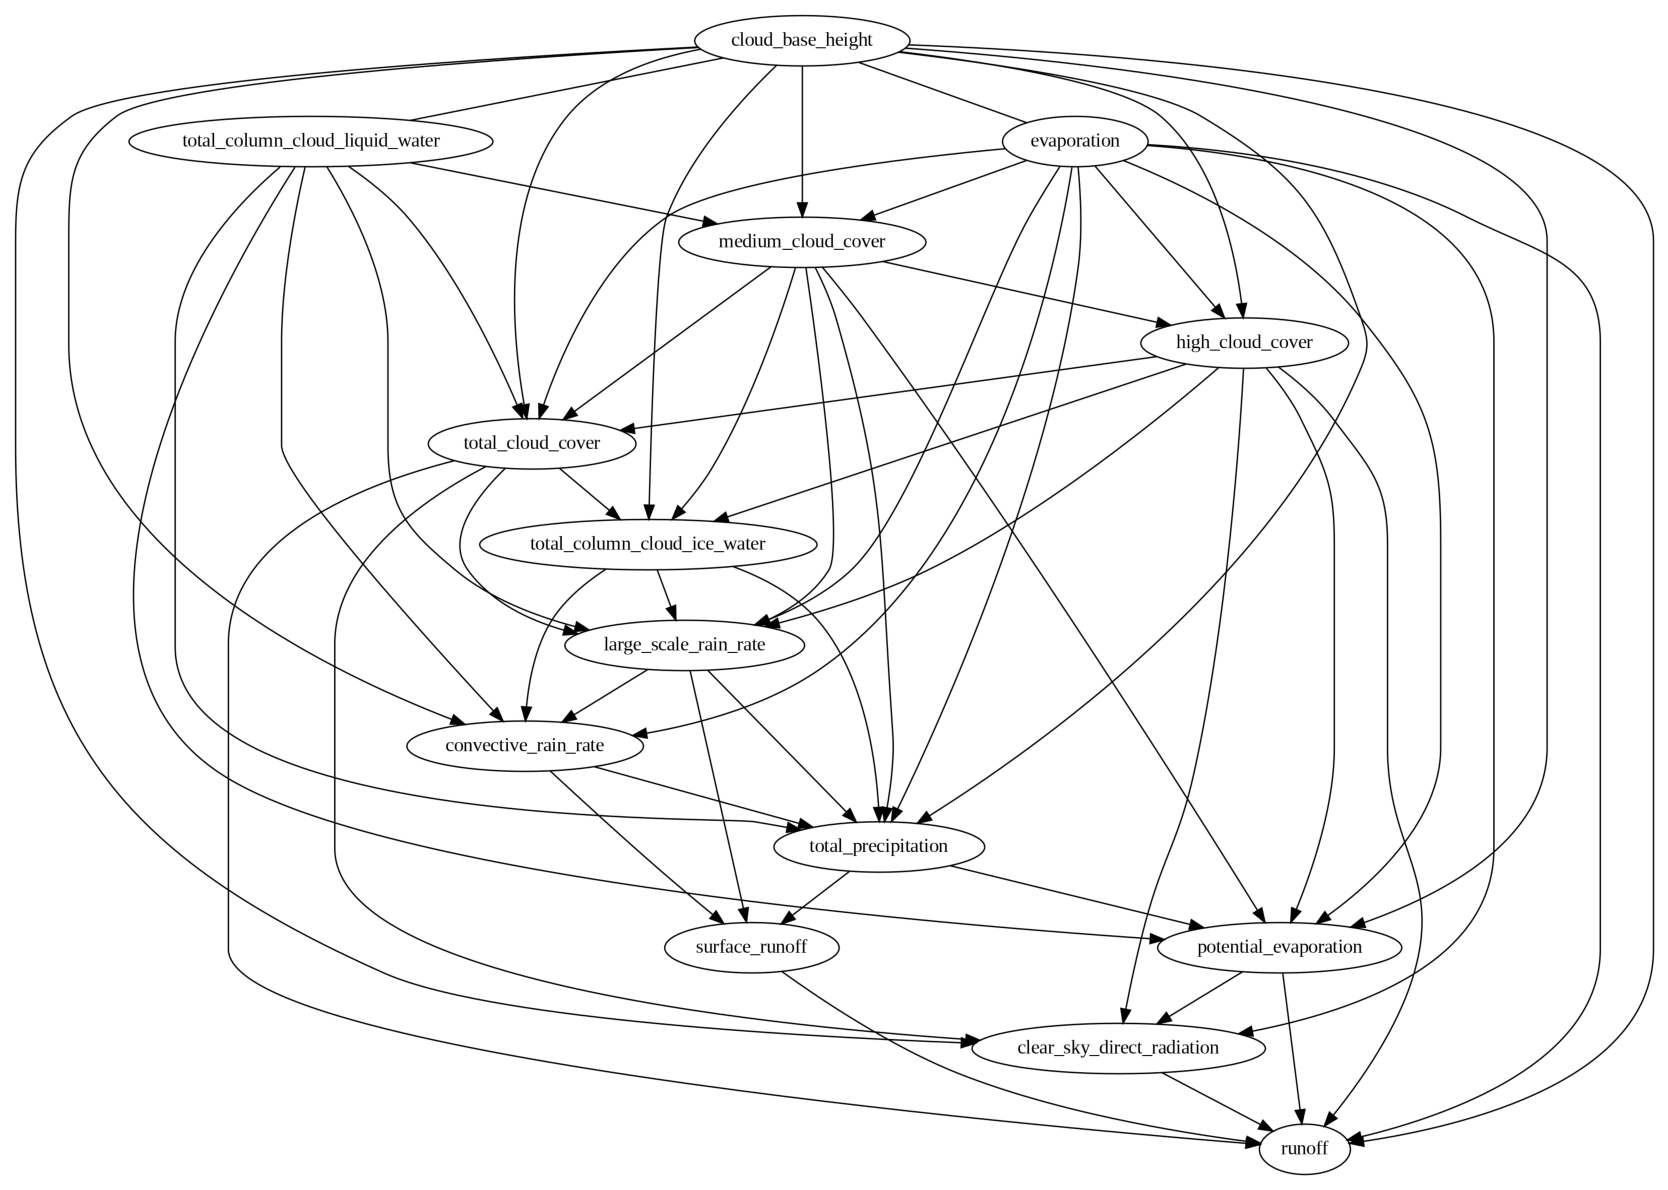

In [ ]:
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'],labels=next_set.columns.to_list())
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
Record['score']

matrix([[-583044.87951792]])

In [ ]:
!pip install elevation


In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.1 MB/s eta 0:00:00


In [ ]:
data[:100]

,valid_time,latitude,longitude,ensemble_member_number,experiment_version_number,dewpoint_temperature_2m,temperature_2m,mean_sea_level_pressure,sea_surface_temperature,surface_pressure,...,large_scale_rain_rate,precipitation_type,total_column_rain_water,snowfall,total_column_snow_water,soil_type,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,volumetric_soil_water_layer_3,volumetric_soil_water_layer_4
0,2023-01-01,55.00,6.00,0,1,282.10767,283.69174,99689.44,282.29858,99698.13,...,0.000227,1.0,0.068604,0.0,0.193359,0.0,0.000013,0.000006,0.000001,0.000000
1,2023-01-01,55.00,6.25,0,1,282.06665,283.80893,99701.94,282.29956,99709.13,...,0.000227,1.0,0.085571,0.0,0.258301,0.0,0.000013,0.000006,0.000001,0.000000
2,2023-01-01,55.00,6.50,0,1,281.98657,283.83823,99718.94,282.28100,99732.13,...,0.000184,1.0,0.098145,0.0,0.334961,0.0,0.000013,0.000006,0.000001,0.000000
3,2023-01-01,55.00,6.75,0,1,281.84595,283.65463,99742.69,282.13843,99747.13,...,0.000184,1.0,0.113281,0.0,0.370605,0.0,0.000013,0.000006,0.000001,0.000000
4,2023-01-01,55.00,7.00,0,1,281.68384,283.44760,99767.44,281.97046,99762.13,...,0.000325,1.0,0.133057,0.0,0.398926,0.0,0.000013,0.000006,0.000001,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-01-01,54.25,7.50,0,1,280.91430,283.84800,100038.94,280.55347,100042.13,...,0.000006,1.0,0.029175,0.0,0.179688,0.0,0.000013,0.000006,0.000001,0.000000
96,2023-01-01,54.25,7.75,0,1,280.74048,283.76205,100064.69,280.00170,100066.13,...,0.000065,1.0,0.027588,0.0,0.149902,0.0,0.000013,0.000006,0.000001,0.000000
97,2023-01-01,54.25,8.00,0,1,280.64478,283.74643,100089.44,279.68823,100087.13,...,0.000020,1.0,0.026367,0.0,0.123047,0.0,0.000013,0.000006,0.000001,0.000000
98,2023-01-01,54.25,8.25,0,1,280.24243,283.33040,100116.19,278.67163,100118.13,...,0.000028,1.0,0.022095,0.0,0.085449,0.0,0.000013,0.000006,0.000001,0.000000


In [ ]:
small = data[:100]

In [ ]:
import elevation
import rasterio

def get_elevation(latitudes, longitudes):
    # Ensure the SRTM data is available
    elevation.clip(bounds=(-60, -5, 80, 5), output='srtm.tif')  # Download global elevation data
    elevations = []

    with rasterio.open('srtm.tif') as src:
        for lat, lon in zip(latitudes, longitudes):
            # Convert lat/lon to row/col in the raster
            row, col = src.index(lon, lat)
            elevations.append(src.read(1)[row, col])
    return elevations

# Example usage:
small['elevation'] = get_elevation(small['latitude'], small['longitude'])


RuntimeError: Too many tiles: 1400. Please consult the providers' websites for how to bulk download tiles.

In [ ]:
!pip install dcor>=0.6 #

In [ ]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
# from tigramite.independence_tests.gpdc import GPDC
# from tigramite.independence_tests.cmiknn import CMIknn
# from tigramite.independence_tests.cmisymb import CMIsymb
# from tigramite.models import LinearMediation, Prediction

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79f58cf052d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so: cannot open shared object file: No such file or directory


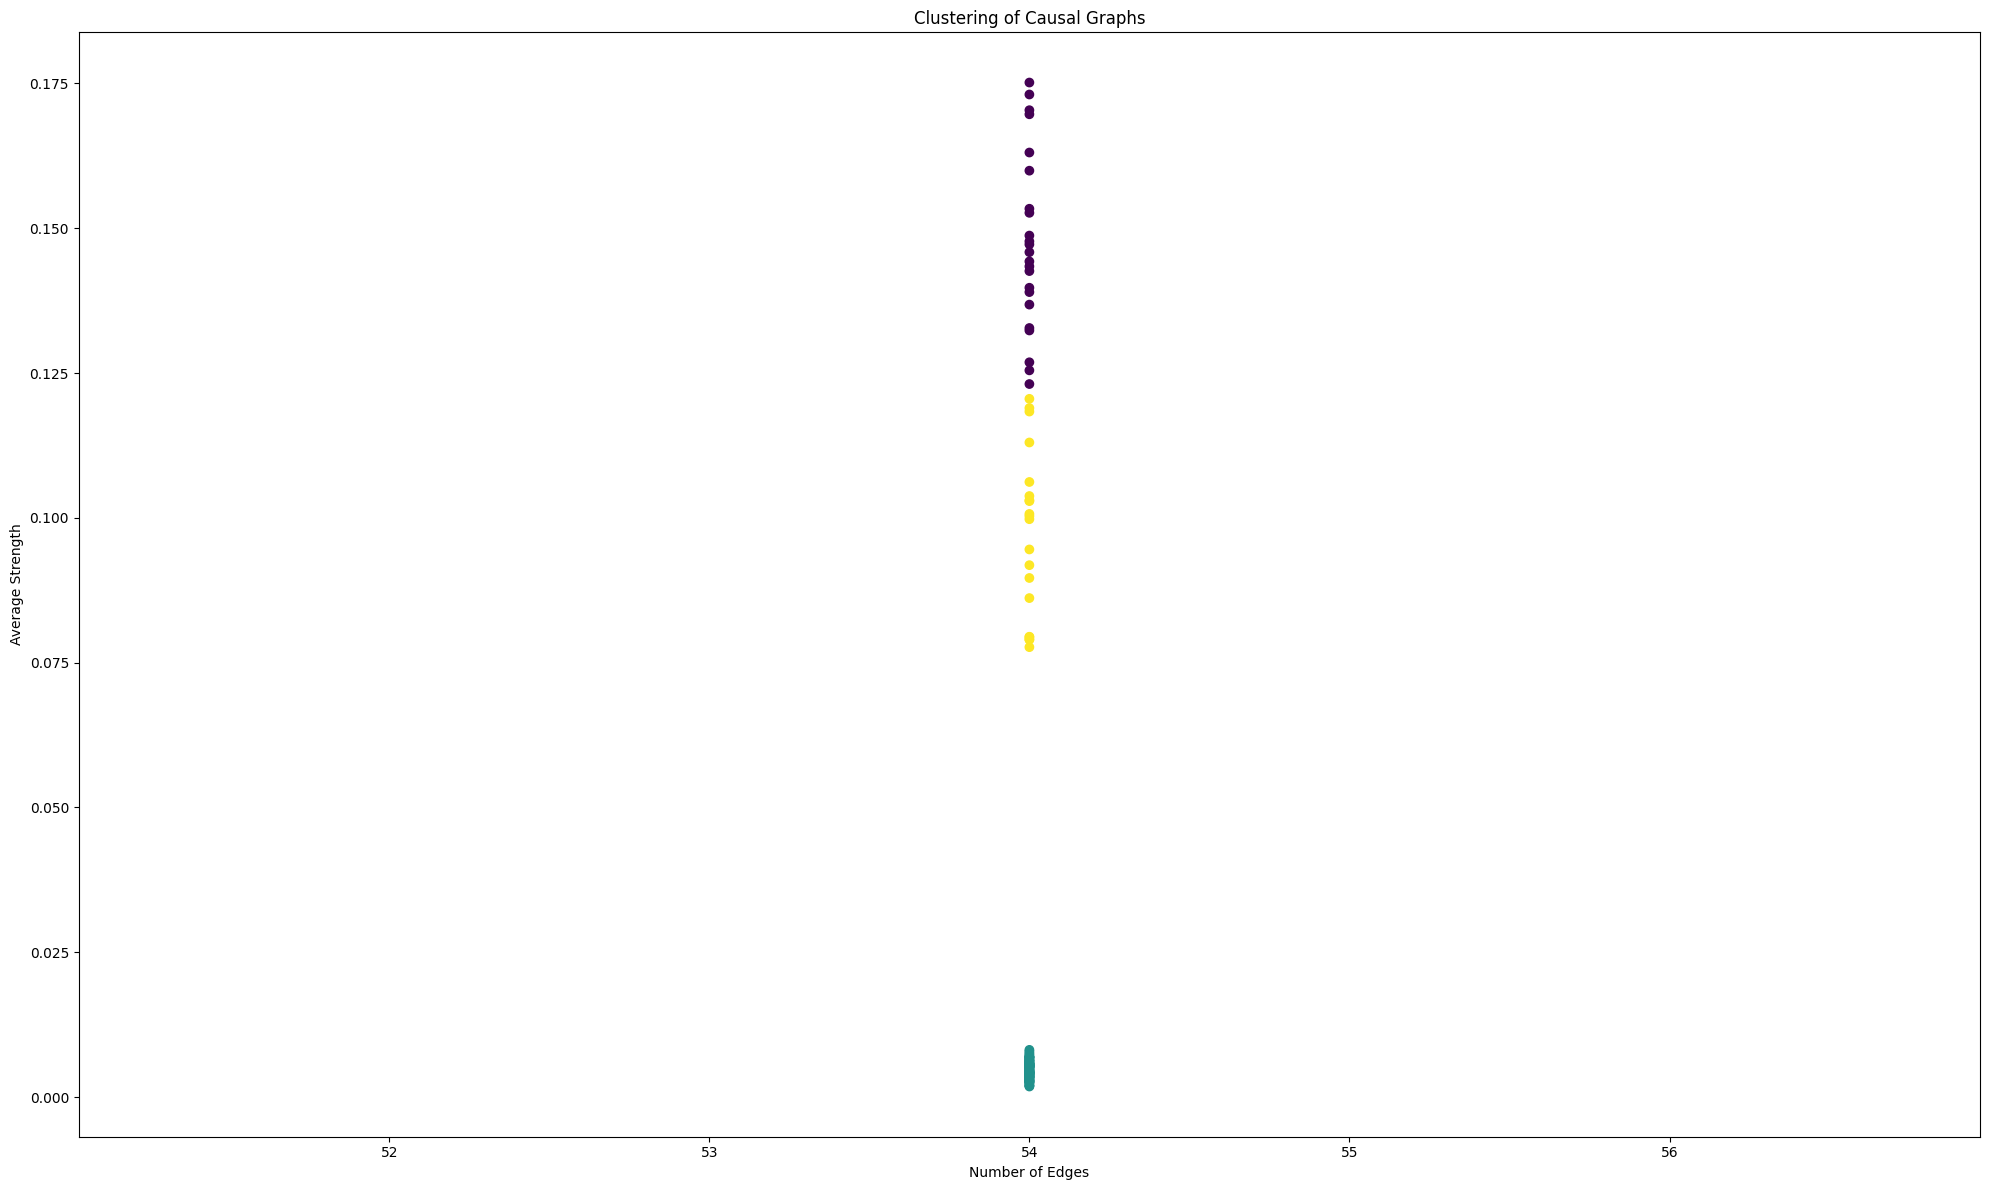

In [ ]:
# import numpy as np
# import pandas as pd
from tigramite.data_processing import DataFrame
# from tigramite.independence_tests import ParCorr
# from tigramite.pcmci import PCMCI
from sklearn.cluster import KMeans

# Example dataset: Add geographic features
# data = pd.read_csv('your_data.csv')  # Contains lat, lon, and time-series variables
# data['elevation'] = get_elevation(data['latitude'], data['longitude'])  # Use a mapping function
# data['slope'] = compute_slope(data['latitude'], data['longitude'])  # Use GIS tools

# Causal discovery for each location
locations = data.groupby(['latitude', 'longitude'])
causal_graph_features = []

for location, df in locations:
    ts_data = df[['total_precipitation', 'runoff', 'surface_runoff']].values
    dataframe = DataFrame(ts_data)

    pcmci = PCMCI(dataframe=dataframe, cond_ind_test=ParCorr())
    results = pcmci.run_pcmci(tau_max=5, pc_alpha=0.05)

    # Extract graph features
    num_edges = np.sum(results['graph'] != 0)  # Total number of edges
    avg_strength = np.mean(np.abs(results['val_matrix']))  # Avg causal strength
    causal_graph_features.append([location, num_edges, avg_strength])

# Clustering
features_df = pd.DataFrame(causal_graph_features, columns=['Location', 'NumEdges', 'AvgStrength'])
kmeans = KMeans(n_clusters=3).fit(features_df[['NumEdges', 'AvgStrength']])
features_df['Cluster'] = kmeans.labels_



In [ ]:
features_df

,Location,NumEdges,AvgStrength,Cluster
0,"(53.5, 6.0)",54,0.152665,0
1,"(53.5, 6.25)",54,0.138983,0
2,"(53.5, 6.5)",54,0.106199,2
3,"(53.5, 6.75)",54,0.103026,2
4,"(53.75, 6.0)",54,0.006148,1
...,...,...,...,...
139,"(55.0, 14.0)",54,0.003954,1
140,"(55.0, 14.25)",54,0.003951,1
141,"(55.0, 14.5)",54,0.003689,1
142,"(55.0, 14.75)",54,0.003947,1


In [ ]:
import zipfile
import os

# Define the path to the zip file and the directory to extract to
zip_path = '/content/ne_110m_admin_0_countries.zip'  # Replace with the path to your zip file
unzip_dir = '/content/ne_110m_admin_0_countries'  # Replace with your desired extraction directory

# Ensure the output directory exists
os.makedirs(unzip_dir, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)
print(f"Extracted all files to: {unzip_dir}")



Extracted all files to: /content/ne_110m_admin_0_countries


In [ ]:
import geopandas as gpd

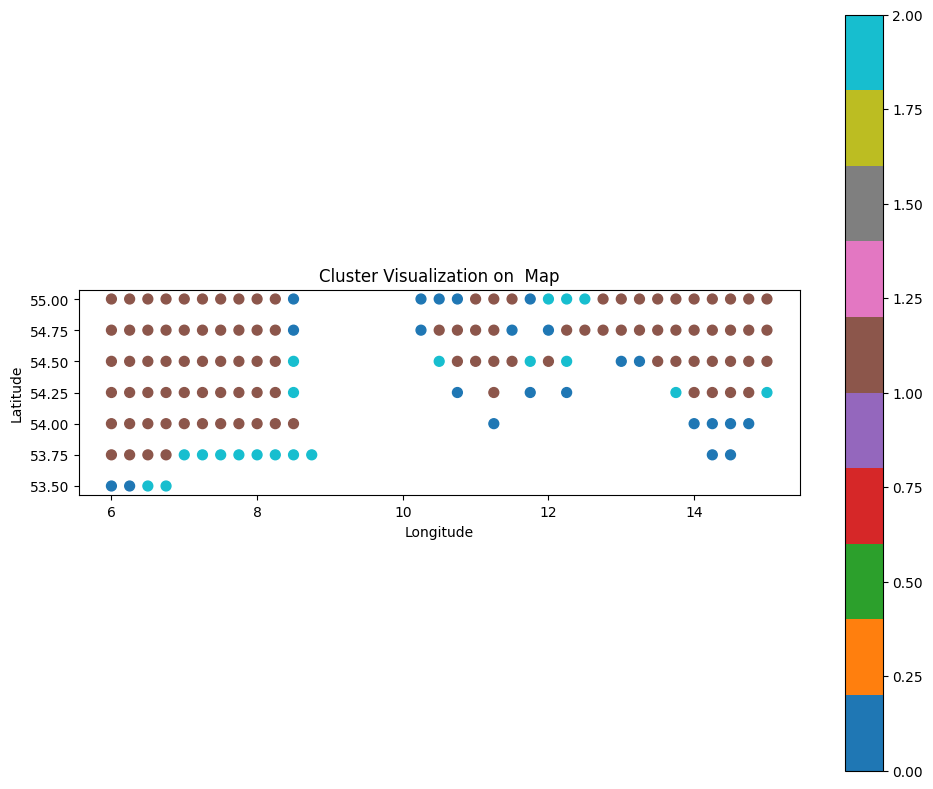

In [ ]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
# germany.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot Germany map
geo_features.plot(ax=ax, column='Cluster', legend=True, cmap='tab10', markersize=50)  # Plot clusters
plt.title("Cluster Visualization on  Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
features_df.groupby(['Cluster'])['NumEdges'].count()

,NumEdges
Cluster,
0,23
1,101
2,20


In [ ]:
features_df[features_df['Cluster']==2]

,Location,NumEdges,AvgStrength,Cluster,geometry
2,"(53.5, 6.5)",54,0.106199,2,POINT (6.5 53.5)
3,"(53.5, 6.75)",54,0.103026,2,POINT (6.75 53.5)
8,"(53.75, 7.0)",54,0.102895,2,POINT (7 53.75)
9,"(53.75, 7.25)",54,0.100301,2,POINT (7.25 53.75)
10,"(53.75, 7.5)",54,0.099774,2,POINT (7.5 53.75)
11,"(53.75, 7.75)",54,0.079422,2,POINT (7.75 53.75)
12,"(53.75, 8.0)",54,0.077682,2,POINT (8 53.75)
13,"(53.75, 8.25)",54,0.079479,2,POINT (8.25 53.75)
14,"(53.75, 8.5)",54,0.086153,2,POINT (8.5 53.75)
15,"(53.75, 8.75)",54,0.094550,2,POINT (8.75 53.75)


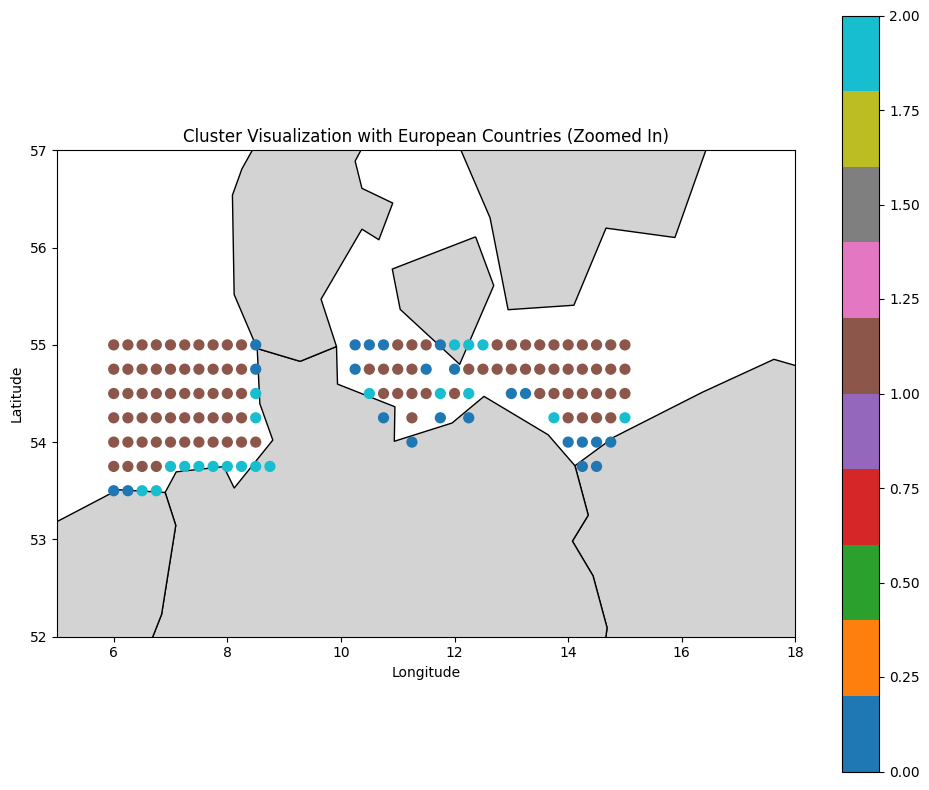

In [ ]:
# Load the shapefile of the world (or Europe if you have a specific file)
shapefile_path = "/content/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Filter for European countries
europe = world[world['CONTINENT'] == 'Europe']

# Create a GeoDataFrame from features_df
features_df['geometry'] = features_df['Location'].apply(lambda loc: Point(loc[1], loc[0]))
geo_features = gpd.GeoDataFrame(features_df, geometry='geometry', crs="EPSG:4326")

# Perform a spatial join to find the countries for each point
geo_features_with_countries = gpd.sjoin(geo_features, europe, how='left', predicate='intersects')
# Plot the map with a zoomed-in view
fig, ax = plt.subplots(figsize=(10, 8))

# Plot European countries
europe.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the clusters
geo_features.plot(ax=ax, column='Cluster', legend=True, cmap='tab10', markersize=50)

# Adjust the zoom-in boundaries (set the range to focus on your area of interest)
ax.set_xlim(5, 18)  # Longitude range for Europe
ax.set_ylim(52, 57)   # Latitude range for Europe

# Add labels and title
plt.title("Cluster Visualization with European Countries (Zoomed In)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [ ]:
data.columns


Index(['valid_time', 'latitude', 'longitude', 'ensemble_member_number',
       'experiment_version_number', 'dewpoint_temperature_2m',
       'temperature_2m', 'mean_sea_level_pressure', 'sea_surface_temperature',
       'surface_pressure', 'total_precipitation', 'wind_u_component_100m',
       'wind_v_component_100m', 'clear_sky_direct_radiation',
       'cloud_base_height', 'high_cloud_cover', 'medium_cloud_cover',
       'total_cloud_cover', 'total_column_cloud_ice_water',
       'total_column_cloud_liquid_water', 'evaporation',
       'potential_evaporation', 'runoff', 'surface_runoff',
       'convective_rain_rate', 'large_scale_rain_rate', 'precipitation_type',
       'total_column_rain_water', 'snowfall', 'total_column_snow_water',
       'soil_type', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'volumetric_soil_water_layer_4'],
      dtype='object')

In [ ]:
locations = data.groupby(['latitude', 'longitude'])
causal_graph_features = []

for location, df in locations:
    ts_data = df[['total_precipitation', 'runoff', 'surface_runoff','mean_sea_level_pressure', 'sea_surface_temperature',
       'surface_pressure', 'total_precipitation', 'wind_u_component_100m',
       'wind_v_component_100m', 'clear_sky_direct_radiation',
       'cloud_base_height']].values
    dataframe = DataFrame(ts_data)

    pcmci = PCMCI(dataframe=dataframe, cond_ind_test=ParCorr())
    results = pcmci.run_pcmci(tau_max=5, pc_alpha=0.05)

    # Extract graph features
    num_edges = np.sum(results['graph'] != 0)  # Total number of edges
    avg_strength = np.mean(np.abs(results['val_matrix']))  # Avg causal strength
    causal_graph_features.append([location, num_edges, avg_strength])


In [ ]:

# Clustering
features_df = pd.DataFrame(causal_graph_features, columns=['Location', 'NumEdges', 'AvgStrength'])
kmeans = KMeans(n_clusters=3).fit(features_df[['NumEdges', 'AvgStrength']])
features_df['Cluster'] = kmeans.labels_